## EDA on Food Prices Portfolio Project

##### The dataset was retrieved from https://www.kaggle.com/datasets/imtkaggleteam/food-prices-in-world/codeon August 18, 2023

The original dataset was comprised of 4 different tables:


1- share-healthy-diet-unaffordable.csv  
2- food-expenditure-per-person-per-year.csv  
3- hare-of-consumer-expenditure-spent-on-food.csv  
4- share-calorie-diet-unaffordable.csv




The first 3 of the 4 tables where selected, loaded and joined for this project, this was the following SQL code used:
    
    SELECT HU.Year, HU.Entity, HU.ShareOfPopCannotAffordHealthyDiet, FEP.TotalFoodExp, 
           HCE.FoodAsShareOfTotalConsumerExpenditure
    FROM
        HealthyUnaff HU
    JOIN
        HareConsExp HCE ON HU.Year = HCE.Year AND HU.Entity = HCE.Entity AND HU.Code = HCE.Code
    JOIN
        FoodExpPerP FEP ON HU.Year = FEP.Year AND HU.Entity = FEP.Entity AND HU.Code = FEP.Code;



In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)



 **Gathering basic information**

In [2]:
df = pd.read_csv('L:\\Data Analytics\\Food Prices\\food-prices-world.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   427 non-null    int64  
 1   Entity                                 427 non-null    object 
 2   ShareOfPopCannotAffordHealthyDiet      427 non-null    float64
 3   TotalFoodExp                           427 non-null    float64
 4   FoodAsShareOfTotalConsumerExpenditure  427 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.8+ KB


In [4]:
df.head()

,Year,Entity,ShareOfPopCannotAffordHealthyDiet,TotalFoodExp,FoodAsShareOfTotalConsumerExpenditure
0,2017,Algeria,32.5,651.2000,37.305225
1,2018,Algeria,31.2,645.6000,37.270523
2,2019,Algeria,29.2,556.0795,37.413000
3,2020,Algeria,31.1,520.0589,37.547940
4,2021,Algeria,32.4,614.0008,37.255870


In [5]:
df.describe()

,Year,ShareOfPopCannotAffordHealthyDiet,TotalFoodExp,FoodAsShareOfTotalConsumerExpenditure
count,427.000000,427.000000,427.000000,427.000000
mean,2018.990632,22.995082,1540.781391,25.592804
std,1.419153,29.249814,916.377111,12.735827
min,2017.000000,0.000000,174.161060,6.226851
25%,2018.000000,1.200000,772.649525,15.718398
50%,2019.000000,7.200000,1325.996000,23.413256
75%,2020.000000,30.550000,2217.666900,32.184000
max,2021.000000,93.500000,4313.358000,59.137882


In [6]:
unique_entities = df['Entity'].nunique()
print(f"Number of unique countries: {unique_entities}")

Number of unique countries: 87


Due to the joins performed, there is unavailable data for some countries, such as Hong Kong, regarding the 'share of people for whom a healthy diet is unaffordable.' Therefore, the analysis is limited to 87 unique countries.

**Renaming Columns**

In [7]:
df.columns

Index(['Year', 'Entity', 'ShareOfPopCannotAffordHealthyDiet', 'TotalFoodExp',
       'FoodAsShareOfTotalConsumerExpenditure'],
      dtype='object')

In [8]:
df = df.rename(columns={'Year':'year',
                       'Entity':'entity',
                       'ShareOfPopCannotAffordHealthyDiet':'share_of_ppl_cannot_healthy_diet',
                       'TotalFoodExp':'total_food_exp',
                       'FoodAsShareOfTotalConsumerExpenditure':'food_total_cons_exp'})

In [9]:
df.columns

Index(['year', 'entity', 'share_of_ppl_cannot_healthy_diet', 'total_food_exp',
       'food_total_cons_exp'],
      dtype='object')

**Exploring the data**

In [10]:
# Check for missing values
df.isna().sum()


year                                0
entity                              0
share_of_ppl_cannot_healthy_diet    0
total_food_exp                      0
food_total_cons_exp                 0
dtype: int64

In [11]:
# Check for duplicates
df.duplicated().sum()


0

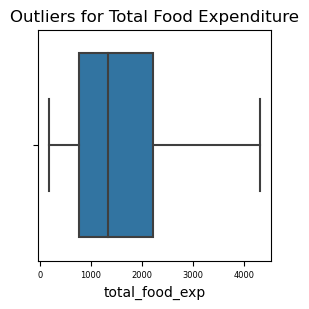

In [12]:
# Create a boxplot to visualize distribution of `total food expenditure` and detect any outliers
plt.figure(figsize=(3,3))
plt.title('Outliers for Total Food Expenditure', fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
sns.boxplot(x=df['total_food_exp'])
plt.show()


The boxplot shows no outliers for Total Food Expenditure. As an added measure, the interquartile range, lower, and upper limits are calculated, and a double-check for outliers is performed.

In [13]:
# Determine the number of rows containing outliers for total_food_exp

# Compute the 25th percentile value in `total_food_exp`
percentile25 = df['total_food_exp'].quantile(0.25)

# Compute the 75th percentile value in `total_food_exp`
percentile75 = df['total_food_exp'].quantile(0.75)

# Compute the interquartile range in `total_food_exp`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `total_food_exp`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `total_food_exp`
outliers_tf = df[(df['total_food_exp'] > upper_limit) | (df['total_food_exp'] < lower_limit)]

# Count how many rows in the data contain outliers in `total_food_exp`
print("Number of rows in the data containing outliers in `total_food_exp`:", len(outliers_tf))

Lower limit: -1394.8765375
Upper limit: 4385.1929625
Number of rows in the data containing outliers in `total_food_exp`: 0


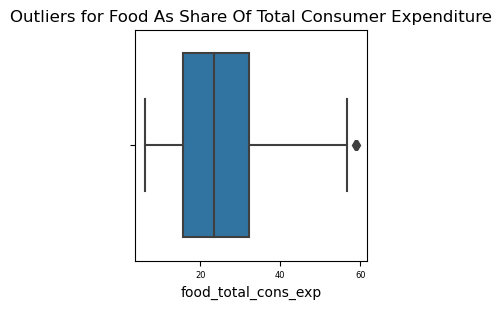

In [14]:
# Create a boxplot to visualize distribution of `Food As Share Of Total Consumer Expenditure` and detect any outliers
plt.figure(figsize=(3,3))
plt.title('Outliers for Food As Share Of Total Consumer Expenditure', fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
sns.boxplot(x=df['food_total_cons_exp'])
plt.show()

Food as a Share of Total Consumer Expenditure is another matter, as outliers can be detected through a boxplot.

In [15]:
# Determine the number of rows containing outliers for food_total_cons_exp

# Compute the 25th percentile value in `food_total_cons_exp`
percentile25 = df['food_total_cons_exp'].quantile(0.25)

# Compute the 75th percentile value in `food_total_cons_exp`
percentile75 = df['food_total_cons_exp'].quantile(0.75)

# Compute the interquartile range in `food_total_cons_exp`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `food_total_cons_exp`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `food_total_cons_exp`
outliers_f = df[(df['food_total_cons_exp'] > upper_limit) | (df['food_total_cons_exp'] < lower_limit)]

# Count how many rows in the data contain outliers in `food_total_cons_exp`
print("Number of rows in the data containing outliers in `food_total_cons_exp`:", len(outliers_f))

Lower limit: -8.980006249999994
Upper limit: 56.882403749999995
Number of rows in the data containing outliers in `food_total_cons_exp`: 6


In [16]:
# Use the indices of the outliers DataFrame to extract corresponding rows from the original DataFrame
outlier_data_f = df.loc[outliers_f.index]

# Now, 'outlier_data_f' contains all the data of the outliers

outlier_data_f.head(6)

,year,entity,share_of_ppl_cannot_healthy_diet,total_food_exp,food_total_cons_exp
224,2020,Kenya,74.5,826.91170,58.689938
271,2017,Nigeria,90.2,920.20000,58.990960
272,2018,Nigeria,91.1,1016.90000,59.008877
273,2019,Nigeria,91.8,850.26790,59.018272
274,2020,Nigeria,93.1,818.39233,59.137882
275,2021,Nigeria,93.5,748.61550,59.012196


The specific outliers found were Nigeria (2017 through 2021) and Kenya (2020).

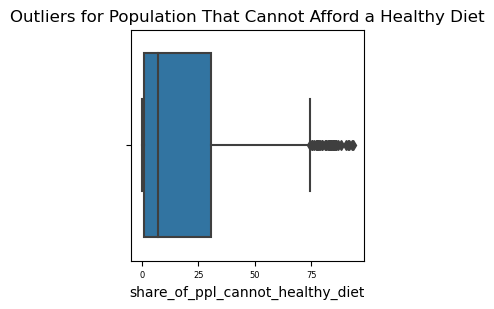

In [17]:
# Create a boxplot to visualize distribution of `Share Of Population That Cannot Afford a Healthy Diet` and detect any outliers
plt.figure(figsize=(3,3))
plt.title('Outliers for Population That Cannot Afford a Healthy Diet', fontsize=12)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
sns.boxplot(x=df['share_of_ppl_cannot_healthy_diet'])
plt.show()

In [18]:
# Determine the number of rows containing outliers for share_of_ppl_cannot_healthy_diet

# Compute the 25th percentile value in `share_of_ppl_cannot_healthy_diet`
percentile25 = df['share_of_ppl_cannot_healthy_diet'].quantile(0.25)

# Compute the 75th percentile value in `share_of_ppl_cannot_healthy_diet`
percentile75 = df['share_of_ppl_cannot_healthy_diet'].quantile(0.75)

# Compute the interquartile range in `share_of_ppl_cannot_healthy_diet`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `share_of_ppl_cannot_healthy_diet`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `share_of_ppl_cannot_healthy_diet`
outliers_s = df[(df['share_of_ppl_cannot_healthy_diet'] > upper_limit) | (df['share_of_ppl_cannot_healthy_diet'] < lower_limit)]

# Count how many rows in the data contain outliers in `share_of_ppl_cannot_healthy_diet`
print("Number of rows in the data containing outliers in `share_of_ppl_cannot_healthy_diet`:", len(outliers_s))

Lower limit: -42.825
Upper limit: 74.575
Number of rows in the data containing outliers in `share_of_ppl_cannot_healthy_diet`: 42


In [19]:
# Use the indices of the outliers DataFrame to extract corresponding rows from the original DataFrame
outlier_data_s = df.loc[outliers_s.index]

# Now, 'outlier_data_s' contains all the data of the outliers
outlier_data_s.head(42)

,year,entity,share_of_ppl_cannot_healthy_diet,total_food_exp,food_total_cons_exp
5,2017,Angola,81.4,1144.60000,48.524673
6,2018,Angola,82.7,893.60000,48.610130
7,2019,Angola,83.9,451.05190,48.611220
8,2020,Angola,86.7,513.12964,49.338432
9,2021,Angola,88.1,657.61290,49.737926
26,2017,Bangladesh,75.3,546.70000,53.487920
91,2017,Cote d'Ivoire,77.7,424.20000,40.453938
131,2017,Ethiopia,85.8,254.90000,56.543922
132,2018,Ethiopia,84.1,257.40000,56.621204
133,2019,Ethiopia,83.4,174.16106,40.520070


In [20]:
unique_entities_in_outliers = outlier_data_s['entity'].nunique()
print(f"Number of unique entities in outliers: {unique_entities_in_outliers}")


Number of unique entities in outliers: 12


Throughout 2017 and 2021, 12 unique countries had a Share of Population That Cannot Afford a Healthy Diet higher than 74.6%

In [21]:
# Filter the DataFrame to only include rows where the 'year' column is equal to 2021
outlier_data_2021 = outlier_data_s[outlier_data_s['year'] == 2021]

# Analyze the data for the year 2021
outlier_data_2021.head(10)


,year,entity,share_of_ppl_cannot_healthy_diet,total_food_exp,food_total_cons_exp
9,2021,Angola,88.1,657.61290,49.737926
135,2021,Ethiopia,83.8,244.73125,41.309013
155,2021,Ghana,77.4,648.25385,39.247723
275,2021,Nigeria,93.5,748.61550,59.012196
290,2021,Pakistan,82.8,383.90683,39.575280
381,2021,Tanzania,85.0,179.84703,27.379164
401,2021,Uganda,81.7,293.40057,44.247470


In 2021, seven countries had a Share of Population That Cannot Afford a Healthy Diet higher than 74.6%.

### Insights

Based on the 1996 World Food Summit, food security is defined as a state in which all people, at all times, have physical and economic access to a sufficient, safe, and nutritious food supply that meets their dietary needs and food preferences, supporting an active and healthy life.

The purpose of this analysis is to draw attention to countries with poor food security in the hope that efforts will be made to improve their conditions.

Of the seven countries in 2021 with a Share of Population That Cannot Afford a Healthy Diet exceeding 74.6%, six were located in Africa, and one was in Asia.

In the year 2021, Nigeria had the highest Share of Population That Cannot Afford a Healthy Diet, standing at a staggering 93.5%.

Digging deeper, Nigeria also exhibited a concerning 59% of Food as a Share of Total Consumer Expenditure, indicating that over half of their expenditures are allocated exclusively to food.

Humanitarian efforts and public policy measures within each country must be implemented to ensure a better quality of life through improved food security for their inhabitants.